In [5]:
# test of one insert only
# 1. import the b0 map from 240807
# import b0map as an object
import numpy as np  
import b0
b0map = b0.b0()
filename_to_import_csv_data_from = r'./data/240731/overnight_ball_240807_R120_12pts_all_rings_in_4ring_easy_bvals_shifted.csv'
b0map.import_from_csv(filename_to_import_csv_data_from)
b0map.transfer_coordinates_of_the_path_from_cosi_to_magnet()


# change coordinates to magnet



No path object given on construction of b0 object.
 b0 instance initialized without path.
importing b0 object from csv file./data/240731/overnight_ball_240807_R120_12pts_all_rings_in_4ring_easy_bvals_shifted.csv
No path object given on construction of b0 object.
 b0 instance initialized without path.
warning. path file  /home/cosi/cosi-measure/Software/COSI2/data/240731/overnight_ball_240807_R120_12pts_all_rings_in_4ring_easy,,,,,,
 not used. path data taken from csv!
importing path from a csv file
ROTATING THE PATH NOW!
path center set to:  [ 0.00280662 -0.01683974 -0.01543643]
ROTATING THE MAGNET NOW!
warning! euler angles of the magnet changed!
len(path.r)= 7126
len(b0Data)= 7126
-110.01403311815879  < x <  109.9859668818412
-110.0014033118159  < y <  109.99859668818416
-110.01262980634294  < z <  109.98737019365711
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0
z step: 10.0


In [6]:
print(np.nanmin(b0map.b0Data[:,:,:,0]))
print(np.nanmax(b0map.b0Data[:,:,:,0]))

# spherical decomposition
diameter_of_sphere = b0map.path.radius*2
order = 17
resolution_of_sph_decomp = 10
print(diameter_of_sphere)
b0map.fitSphericalHarmonics(maxorder=order,dsv=diameter_of_sphere,resol=resolution_of_sph_decomp)

resolution_of_sph_fit=8
print('interpolating field with sph order %d, resol %.0f mm'%(order,resolution_of_sph_fit))

b0map.interpolateField(resol=resolution_of_sph_fit,dsv=diameter_of_sphere)


-47.484
-47.239
240.0131016338168
(23, 23, 23)
Mean field strength in 24 cm sphere: -47.33 mT
Inhomogeneity in 24 cm sphere: -5177 ppm
Inhomogeneity of fit: 5321 ppm
Error: 140075714 ppm
saved numpy array as ./data/tmp/SpHData.npy
interpolating field with sph order 17, resol 8 mm
sph coefficients loaded
making a fine coordinate grid
Inhomogeneity of fit: 4677 ppm
saved numpy array as ./data/tmp/B0_interpolated.npy


In [7]:
print('now we have an interpolated field.')
print(np.shape(b0map.interpolatedField))
print('on a coordinate grid')
print(np.shape(b0map.coord_grid_fine))



now we have an interpolated field.
(31, 31, 31)
on a coordinate grid
(3, 31, 31, 31)


In [24]:
# shim magnets positinoing

mu                  = 1e-7

magSizeOuter        = 6*1e-3        #size of shim magnets
bRem                = 1.35 # [T]      #remanence field of shim magnets

#shim tray configuration
def ringposFromTrayNr(trays_ocp):
    trayslitspacing = 9e-3 # [m]
    coordinates = []
    for tray_pos in trays_ocp:
        coordinate = trayslitspacing*tray_pos-4.5e-3 if tray_pos>0 else trayslitspacing*tray_pos+4.5e-3
        coordinates.append(coordinate)
    return coordinates


shimRadius          = 50#! TEMP 276*1e-3#276*1e-3 <- was set by Tom!      # radius on which the shim magnets are placed

# we insert a magnet into ring 2 insert 6
trays_occupied = [1] #<- ring 2(insert 1) only [-7,-5,1,14]# 9mm best #[-18,-5,1,12] <- 27mm best  [-7,-5,1,14] 997
ringPositions       = ringposFromTrayNr(trays_occupied)#[-121.5*1e-3, -40.5*1e-3, 31.5*1e-3, 121.5*1e-3]#np.linspace(-ringspacingouter,ringspacingouter,4)#np.linspace(-0.1755,0.1755,4)          #np.linspace(-0.2295, .2295, 4) #Z positions to place shin rubgs
print(np.array(ringPositions)*1e3)


[4.5]


In [25]:

magsPerSegment      = 7             # number of magnets peer shim tray segment
anglePerSegment     = 19.25 #the angular distance in degrees between the furthest magnets in a shim tray (span of magnets in shim tray)
numSegments         = 12 #corresponds to the number of shim trays


segmentAngles       = np.linspace(0,360, numSegments, endpoint = False)

magAngles           = np.linspace(-anglePerSegment/2, anglePerSegment/2, magsPerSegment) 

print('let us position some magnets on a circumference of a R=%.0f mm YZ circle with X=0'%(shimRadius*1000))

positions = []
for ringPosition in ringPositions:
    for segmentAngle in segmentAngles:
        for magAngle in magAngles:
            position = [ringPosition,shimRadius*np.cos((segmentAngle+magAngle)*np.pi/180), shimRadius*np.sin((segmentAngle+magAngle)*np.pi/180)]
            # ONLY INSERT 6, max y, min(|z|)
            if (segmentAngle > -360/12*0.5) and (segmentAngle < 360/12*0.5):
                positions.append(position)

        # check if rings are in the right plane
        #print(positions) 
#!TEMP!!!
#pos = [0,-20e-3,60e-3]
#positions = []
#positions.append(pos)
#print(len(positions))
print(positions)


let us position some magnets on a circumference of a R=50000 mm YZ circle with X=0
[[0.0045, 49.29615883099798, -8.359947637935283], [0.0045, 49.68677260593672, -5.587900142802902], [0.0045, 49.921631735635586, -2.798336086245198], [0.0045, 50.0, 0.0], [0.0045, 49.921631735635586, 2.798336086245199], [0.0045, 49.68677260593672, 5.587900142802905], [0.0045, 49.29615883099798, 8.359947637935283]]


magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  31
computing field of one shim magnet at  0.0045 49.29615883099798 -8.359947637935283
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  31
computing field of one shim magnet at  0.0045 49.68677260593672 -5.587900142802902
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  31
computing field of one shim magnet at  0.0045 49.921631735635586 -2.798336086245198
magnet created, dipole points to  [0. 1. 0.]
[0.00000000e+00 2.32047907e-08 0.00000000e+00]
!!!!!!!!!!!!!!!!!!!!!! 1.35
x vector length in single magnet simulation:  31
computing field of one shim magnet at  0.0045 50.0 0.0
magnet created, dip

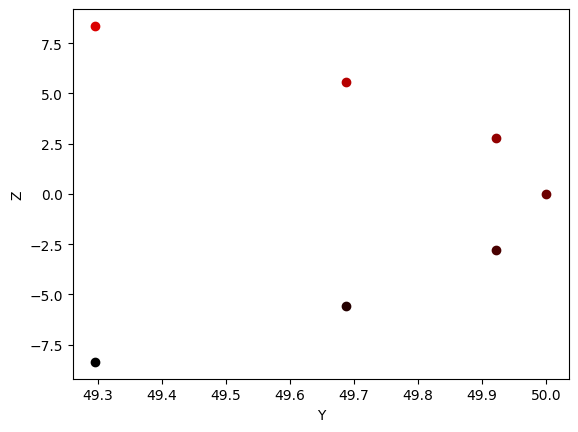

In [26]:
# render magnetic fields of shim magnets
import matplotlib.pyplot as plt
for idx,position in enumerate(positions):

    plt.scatter(position[1],position[2],color = [idx/len(positions),0,0])

plt.xlabel('Y')
plt.ylabel('Z')


initialField = b0map.interpolatedField
numMags = len(positions)
coordinate_grid = b0map.coord_grid_fine



magnetFields = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)
magnetFields_fair = np.zeros((np.shape(initialField)+(3,numMags)), dtype = np.float32)


def magnetization(bRem, dimensions, shape = 'cube', evalDistance = 1):
    #Use the analytical expression for the z component of a cube magnet to estimate
    #dipole momentstrength for correct scaling. Dipole approximation only valid 
    #far-ish away from magnet, comparison made at 1 meter distance.
    if shape == 'cube':
        b_analytic = (bRem/np.pi) *(np.arctan2(dimensions**2, 2*evalDistance *np.sqrt(4*(evalDistance**2) + 2*(dimensions**2)))-\
                        np.arctan2(dimensions**2, 2*(dimensions + evalDistance)*\
                                   np.sqrt(4*((dimensions+evalDistance)**2)+2*(dimensions**2))))
    
        dip_mom = b_analytic * (dimensions/2 + evalDistance)**3 /(2*mu) #strength of the dipole moment
    
    return dip_mom

from utils import shimming_magnet

shimming_magnets = []

DSV = 2*max(b0map.xDim_SPH_fine)#b0map.path.radius*2

dip_mom = magnetization(bRem=bRem,dimensions=magSizeOuter)
dip_vec = mu*np.array([0,dip_mom,0]) #initially along y

for idx1, position in enumerate(positions):
    magnet = shimming_magnet.shimming_magnet(position=position,rotation_yz=0)
    magnet.render_field(grid=coordinate_grid)
    #magnetFields[:,:,:,:,idx1] = magnet.singleMagnet(position, grid=coordinate_grid)
    magnetFields[:,:,:,:,idx1] = magnet.OLD_singleMagnet(position=position,dipoleMoment = dip_vec, 
                                                         simDimensions=[DSV*1e-3,DSV*1e-3,DSV*1e-3],
                                                         resolution=1/resolution_of_sph_fit*1e3,
                                                         plotFields=False)[:,:,:,:] #singleMagnet(position, grid=coordinate_grid)

    #magnetFields_fair[:,:,:,:,idx1] = magnet.singleMagnet(position=position,grid=coordinate_grid,plotFields=False)

    shimming_magnets.append(magnet)

magnetFields *= 1e3

print(DSV)


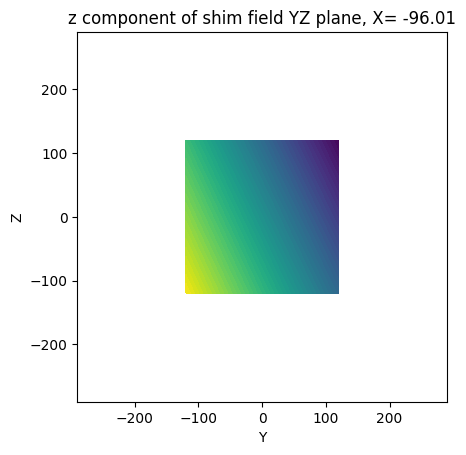

In [27]:
# visualize the field of one magnet
resolution = 1/resolution_of_sph_fit*1e3

X = b0map.xDim_SPH_fine*1e0
Y = b0map.yDim_SPH_fine*1e0
Z = b0map.zDim_SPH_fine*1e0

ONEMAGNETFIELD = magnetFields[:,:,:,:,0]*0
yzsliceindex = 3
ax.contourf(y2d,z2d,ONEMAGNETFIELD[yzsliceindex,:,:,2],cmap='viridis',levels=64)#,vmin = -scale, vmax= scale)


ax = plt.figure().add_subplot()
for idx in range(0,3,1):

    position = positions[idx]

    x,y,z = coordinate_grid
    y2d, z2d = np.meshgrid(Y,Z,indexing='xy')

    ONEMAGNETFIELD += magnetFields[:,:,:,:,idx]#+magnetFields[:,:,:,:,idx+14]

    
    
    
    ax.plot(position[1]*1000,position[2]*1000,'x')
scale = 5e-0

#ax.plot(min(Y),min(Z),'ko')
#ax.plot(max(Y),max(Z),'ko')

ax.set_xlabel('Y')
ax.set_ylabel('Z')
ax.set_xlim(-290,290)
ax.set_ylim(-290,290)
ax.set_aspect(1)
                
ax.set_title('z component of shim field YZ plane, X= %.2f'%(X[yzsliceindex]))

plt.savefig('./pics/R2_insert_6_fields.png',format="png")
plt.savefig('./pics/R2_insert_6_fields.pdf',format="pdf")

plt.show()

(30, 30, 30, 3, 336)


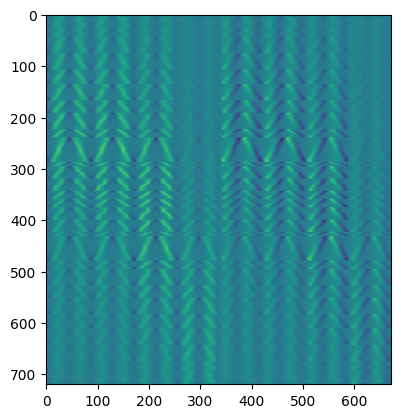

In [102]:
# mask the magnet fields
# DSV = b0map.path.radius*2 # DEFINED ABOVE!
DSV_INNER = b0map.path.radius*1.96#1.95 # DEFINED ABOVE!
# make a spherical mask with diameter DSV
sphereMask = np.zeros(np.shape(coordinate_grid[0]), dtype = float)
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV/2)**2] = 1 
sphereMask[np.square(coordinate_grid[0]) + np.square(coordinate_grid[1]) + np.square(coordinate_grid[2]) <= (DSV_INNER/2)**2] = 0 

sphereMask[sphereMask == 0] = np.nan

print(np.shape(magnetFields))

maskedFields = magnetFields[sphereMask == 1, :,:].astype(float)
maskedFields_stacked = np.hstack((maskedFields[:,1,:],maskedFields[:,2,:])) # WE HAVE Y AND Z


plt.imshow(maskedFields_stacked) #



In [103]:
# masking the magnet fields

print(np.shape(maskedFields_stacked))

vector_of_magnet_rotations = np.zeros(len(shimming_magnets))

stackedRotationVector = np.hstack([np.sin(vector_of_magnet_rotations),np.cos(vector_of_magnet_rotations)])
print(np.shape(stackedRotationVector))

rotatedFieldOfShimMagnetsStacked = np.matmul(maskedFields_stacked,stackedRotationVector)

print(np.shape(rotatedFieldOfShimMagnetsStacked))


(720, 672)
(672,)
(720,)


In [104]:
#plt.imshow(initialField[1,:,:])

initialFieldMasked = initialField[sphereMask == 1]
print(np.shape(initialFieldMasked))
print(np.shape(initialField))

(720,)
(30, 30, 30)


In [105]:
# ok now we have magnet fields and vector of magnet rotations. we can make fields now
def _dataFitting(shimVector):
            #factor = 1+np.random.randint(10)/1000
            #shimVector = shimVector*factor
            stackedRotationVector = np.hstack([np.sin(shimVector),np.cos(shimVector)])
            shimField = np.matmul(maskedFields_stacked*1.00,stackedRotationVector)+initialFieldMasked
            #optimizedField = np.matmul(magnetFields[...,1,:], np.cos(shimVector)) + np.matmul(magnetFields[...,2,:], np.sin(shimVector))
            #shimField = optimizedField + initialField
            #shimField[np.isnan(shimField)] = np.nanmean(shimField)*1
            #shimField = shimField[~np.isnan(shimField)]
            

            #shimField = shimField.flatten()

            return np.square(((shimField)/np.mean(shimField)) -1)*1e9


[ 0.00000000e+00 -3.04017556e-09  2.30047744e-08]
[ 0.00000000e+00 -3.04017556e-09  2.30047744e-08]
[ 0.00000000e+00 -3.36876597e-09  2.29589574e-08]
[ 0.00000000e+00 -3.05905486e-09  2.30022715e-08]
[ 0.00000000e+00 -2.21649790e-09  2.30986893e-08]
[ 0.00000000e+00 -1.03936415e-09  2.31815020e-08]
[ 0.00000000e+00 -1.26240306e-10  2.32044473e-08]
[ 0.00000000e+00 -3.51635252e-11  2.32047641e-08]
[ 0.00000000e+00 -8.51353355e-09  2.15866176e-08]
[ 0.00000000e+00 -1.49116729e-08  1.77793229e-08]
[ 0.00000000e+00 -2.26696800e-08  4.95458561e-09]
[ 0.00000000e+00 -1.58542306e-08 -1.69441932e-08]
[ 0.00000000e+00 -2.55078980e-09 -2.30641666e-08]
[0.00000000e+00 2.32047907e-08 1.97998817e-14]
[0.00000000e+00 2.32047907e-08 1.48499901e-17]
[0.00000000e+00 2.32047907e-08 4.73388383e-14]
[ 0.00000000e+00  2.24919181e-08 -5.70753285e-09]
[ 0.00000000e+00  2.31048693e-08 -2.15112239e-09]
[ 0.00000000e+00  2.32047907e-08 -5.44480710e-14]
[0.00000000e+00 2.28567639e-08 4.00383029e-09]
[ 0.00000000

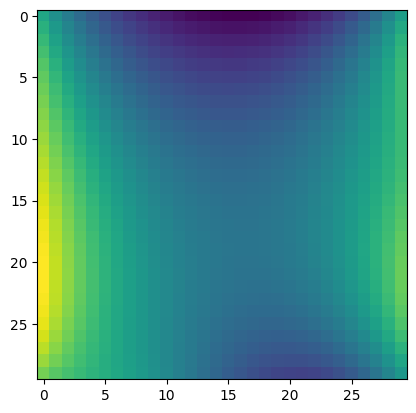

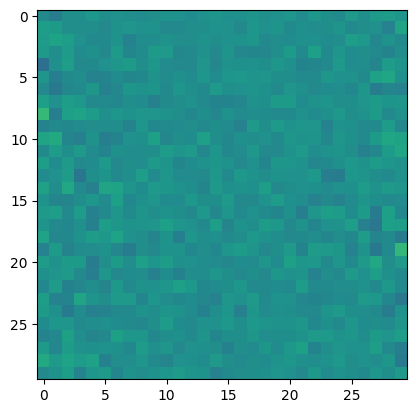

In [116]:
#render the field of rotated magnets
#optimized_vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#+np.pi/4*8.05#np.random.randint(40)*2*np.pi/40
optimized_vector_of_magnet_rotations = np.load('opt1e3.npy')
shimming_magnets[0].render_field(coordinate_grid)
shimFieldRendered = shimming_magnets[0].B0*0

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.rotation_yz = alpha
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0
    
shimFieldRendered*=1e3

optimizedField = np.matmul(magnetFields[...,1,:], np.sin(optimized_vector_of_magnet_rotations)) + np.matmul(magnetFields[...,2,:], np.cos(optimized_vector_of_magnet_rotations))


plt.imshow(shimFieldRendered[6,:,:,2])
plt.show()
plt.imshow(optimizedField[6,:,:]-shimFieldRendered[6,:,:,2],vmin=-1e-6,vmax=1e-6)
plt.show()

In [119]:
# now do the least squares optimization
vector_of_magnet_rotations =np.load('opt1e3.npy')#
#vector_of_magnet_rotations = np.zeros(len(shimming_magnets))#vector_of_magnet_rotations*0 ##
cost = _dataFitting(vector_of_magnet_rotations)

print(np.sum(cost))

# least squares optimization of the rotation vector
from scipy.optimize import least_squares

initialGuess = vector_of_magnet_rotations
#initialGuess[initialGuess<0.001] = 0.001
lsqData = least_squares(_dataFitting, initialGuess, max_nfev=6400, xtol = 1e-5,ftol=0, verbose=2,bounds=(initialGuess*0,initialGuess*0+2*np.pi))


22400.27917676339
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         8.8843e+05                                    2.22e+02    
       1              4         8.8842e+05      2.31e+00       9.35e-02       4.20e+03    
       2              5         8.8841e+05      9.81e+00       4.09e-02       1.00e+03    
       3              6         8.8841e+05      5.84e+00       5.91e-03       6.96e+02    
       4              7         8.8840e+05      6.90e+00       1.31e-02       3.54e+02    
       5              8         8.8840e+05      2.92e+00       1.57e-02       2.64e+02    
       6              9         8.8840e+05      3.03e+00       1.33e-02       4.61e+02    
       7             10         8.8839e+05      9.00e-01       1.38e-02       6.80e+02    
       8             11         8.8839e+05      1.60e+00       3.32e-03       5.02e+02    
       9             12         8.8839e+05      2.01e+00       5.64e-03 

In [118]:
optimized_vector_of_magnet_rotations = lsqData.x
np.save('opt1e3',optimized_vector_of_magnet_rotations)
#np.save('opt336magnets_27mm_1607ppm',optimized_vector_of_magnet_rotations)

#print(optimized_vector_of_magnet_rotations)

shimFieldRendered = shimming_magnets[0].B0[:,:,:,2]*0
    

for idx, magnet in enumerate(shimming_magnets):
    alpha = optimized_vector_of_magnet_rotations[idx]
    magnet.rotation_yz = alpha#+(np.pi/2-abs(alpha-np.pi/2))*1.41#+2*np.pi/4
    #pos = positions[idx]
    #magnet.position = positions[idx]
    #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
    magnet.render_field(grid=coordinate_grid)
    shimFieldRendered += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

shimField_fair = initialField+shimFieldRendered*1.0e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s


optimizedField = np.matmul(magnetFields[...,1,:], np.sin(lsqData.x)) + np.matmul(magnetFields[...,2,:], np.cos(lsqData.x))
#print(np.shape(optimizedField))



shimField = initialField+optimizedField

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_cheap = (np.nanmax(shimField)-np.nanmin(shimField))/np.nanmean(shimField)*1e6
print('homo cheap ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_cheap)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimField))))


homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo_fair = (np.nanmax(shimField_fair)-np.nanmin(shimField_fair))/np.nanmean(shimField_fair)*1e6
print('homo fair ppm %.0f -> %.0f'%(abs(homoinit),abs(homo_fair)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimField))))

shimoffset = np.nanmean(shimField) - np.nanmean(initialField)
#d = np.shape(coordinate_grid[0])
#print(d[0])


[ 0.00000000e+00 -3.01164289e-09  2.30085271e-08]
[ 0.00000000e+00 -3.76477979e-09  2.28973523e-08]
[ 0.00000000e+00 -4.02242853e-09  2.28534982e-08]
[ 0.00000000e+00 -3.72875296e-09  2.29032468e-08]
[ 0.00000000e+00 -3.08103878e-09  2.29993372e-08]
[ 0.00000000e+00 -2.56159181e-09  2.30629694e-08]
[ 0.00000000e+00 -2.56678747e-09  2.30623918e-08]
[ 0.00000000e+00 -1.18857084e-08  1.99296825e-08]
[ 0.00000000e+00 -1.83574945e-08  1.41938263e-08]
[ 0.00000000e+00 -2.31980952e-08 -5.57396278e-10]
[ 0.00000000e+00 -1.48250521e-08 -1.78516146e-08]
[ 0.00000000e+00 -3.06942939e-09 -2.30008894e-08]
[0.00000000e+00 2.32047907e-08 2.99574194e-15]
[0.00000000e+00 2.32047907e-08 1.69259878e-18]
[0.00000000e+00 2.32047896e-08 7.28031450e-12]
[ 0.00000000e+00  2.26242892e-08 -5.15789190e-09]
[ 0.00000000e+00  2.31267600e-08 -1.90138952e-09]
[ 0.00000000e+00  2.32047907e-08 -4.08256790e-13]
[0.00000000e+00 2.25761939e-08 5.36449269e-09]
[ 0.00000000e+00  2.32047907e-08 -1.52769340e-13]
[ 0.00000000

30


<Figure size 640x480 with 0 Axes>

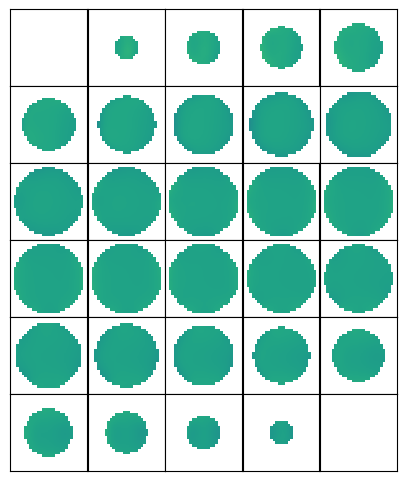

In [70]:
# save as 2d plots
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map.xDim_SPH_fine

shimoffset = np.nanmean(shimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(shimField[i+j*5,:,:],clim=[1.00*np.nanmin(initialField)+shimoffset,1.00*np.nanmax(initialField)+shimoffset])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./pics/shim_field_iter2.png',format="png")
plt.savefig('./pics/shim_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()


30


<Figure size 640x480 with 0 Axes>

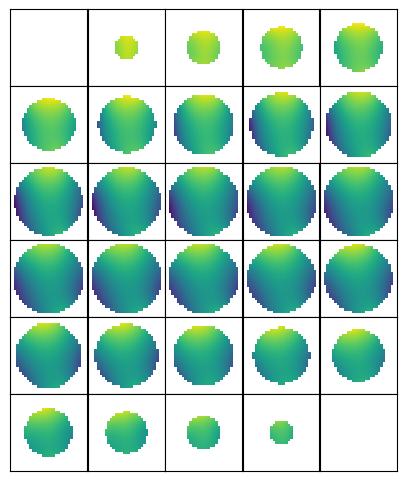

In [71]:
# save initial field as 2d plots
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map.xDim_SPH_fine

shimoffset = np.nanmean(shimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(initialField[i+j*5,:,:],clim=[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./pics/init_field_iter2.png',format="png")
plt.savefig('./pics/init_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()

30


<Figure size 640x480 with 0 Axes>

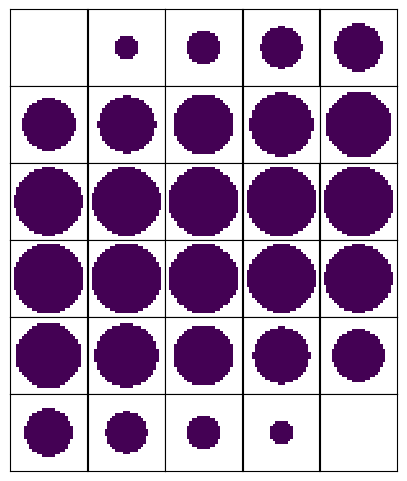

In [80]:
# save rendered shimmed as 2d plots
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map.xDim_SPH_fine

shimoffset = np.nanmean(shimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])

shimFieldRendered_masked = shimFieldRendered[sphereMask == 1]

for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(initialField[i+j*5,:,:]-optimizedField[i+j*5,:,:],vmin=np.nanmin(initialField)+shimoffset,vmax=np.nanmax(initialField)+shimoffset)#*1+np.nanmean(initialField),clim=[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./pics/shimming_field_iter2.png',format="png")
plt.savefig('./pics/shimming_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()





<Figure size 640x480 with 0 Axes>

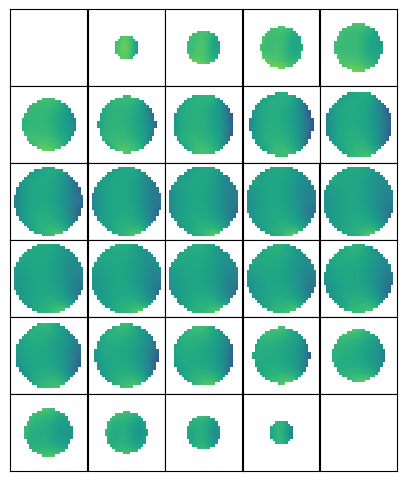

In [29]:
field_iter2 = b0map_after.interpolatedField

# save as 2d plots
plt.figure(0)

fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

xvals = b0map_after.xDim_SPH_fine


for i in range(5):
    for j in range(6):
        xxx = axes[j,i].imshow(field_iter2[i+j*5,:,:]+np.nanmean(initialField)-np.nanmean(field_iter2),clim=[np.nanmin(initialField),np.nanmax(initialField)])
        axes[j,i].xaxis.set_visible(False)
        axes[j,i].yaxis.set_visible(False)
        
plt.subplots_adjust(wspace=0, hspace=0)

plt.savefig('./pics/mapped_field_iter2.png',format="png")
plt.savefig('./pics/mapped_field_iter2.pdf',format="pdf")
#plt.colorbar(mappable=xxx)
plt.show()



0.0
[ 0.00000000e+00 -3.05335734e-09  2.30030285e-08]
[ 0.00000000e+00 -3.38202581e-09  2.29570079e-08]
[ 0.00000000e+00 -3.07668703e-09  2.29999197e-08]
[ 0.00000000e+00 -2.22975921e-09  2.30974130e-08]
[ 0.00000000e+00 -1.06763109e-09  2.31802173e-08]
[ 0.00000000e+00 -1.48313126e-10  2.32043167e-08]
[ 0.00000000e+00 -3.41754047e-11  2.32047655e-08]
[ 0.00000000e+00 -8.53360362e-09  2.15786914e-08]
[ 0.00000000e+00 -1.49341469e-08  1.77604495e-08]
[ 0.00000000e+00 -2.26704969e-08  4.95084649e-09]
[ 0.00000000e+00 -1.58503603e-08 -1.69478137e-08]
[ 0.00000000e+00 -2.53663514e-09 -2.30657277e-08]
[0.00000000e+00 2.32047907e-08 2.40027300e-14]
[0.00000000e+00 2.32047907e-08 1.86470678e-17]
[0.00000000e+00 2.32047907e-08 5.56164825e-14]
[ 0.00000000e+00  2.24916174e-08 -5.70871760e-09]
[ 0.00000000e+00  2.31037522e-08 -2.16308666e-09]
[ 0.00000000e+00  2.32047907e-08 -5.53769043e-14]
[0.00000000e+00 2.28563937e-08 4.00594309e-09]
[ 0.00000000e+00  2.32047884e-08 -1.02941717e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

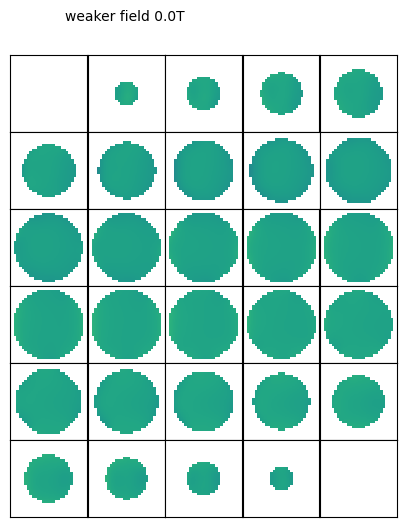

0.2
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0. -0.]
[ 0. -0. -0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[0. 0. 0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0. -0.  0.]
[0. 0. 0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0. -0.]
[ 0. -0. -0.]
[ 0. -0. -0.]
[ 0. -0. -0.]
[0. 0. 0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0. -0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]
[ 0.  0. -0.]
[ 0.  0. -0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.  0.]
[ 0. -0.

<Figure size 640x480 with 0 Axes>

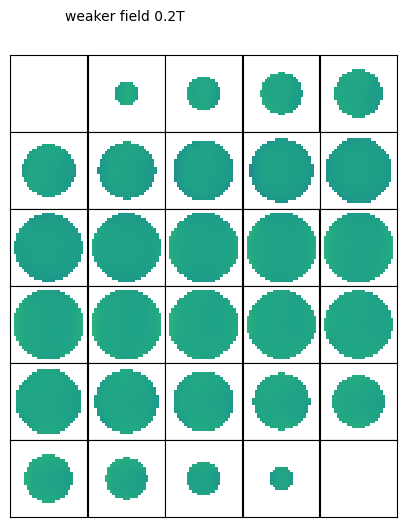

0.4
[ 0.00000000e+00 -4.52349236e-10  3.40785607e-09]
[ 0.00000000e+00 -5.01040861e-10  3.40103821e-09]
[ 0.00000000e+00 -4.55805486e-10  3.40739552e-09]
[ 0.00000000e+00 -3.30334698e-10  3.42183896e-09]
[ 0.00000000e+00 -1.58167569e-10  3.43410627e-09]
[ 0.00000000e+00 -2.19723150e-11  3.43767655e-09]
[ 0.00000000e+00 -5.06302292e-12  3.43774304e-09]
[ 0.00000000e+00 -1.26423757e-09  3.19684316e-09]
[ 0.00000000e+00 -2.21246621e-09  2.63117771e-09]
[ 0.00000000e+00 -3.35859214e-09  7.33458739e-10]
[ 0.00000000e+00 -2.34820153e-09 -2.51078722e-09]
[ 0.00000000e+00 -3.75797798e-10 -3.41714484e-09]
[0.00000000e+00 3.43774677e-09 3.55596000e-15]
[0.00000000e+00 3.43774677e-09 2.76252856e-18]
[0.00000000e+00 3.43774677e-09 8.23947890e-15]
[ 0.00000000e+00  3.33209147e-09 -8.45735940e-10]
[ 0.00000000e+00  3.42277811e-09 -3.20457283e-10]
[ 0.00000000e+00  3.43774677e-09 -8.20398582e-15]
[0.00000000e+00 3.38613239e-09 5.93473050e-10]
[ 0.00000000e+00  3.43774643e-09 -1.52506247e-12]
[ 0.0000

<Figure size 640x480 with 0 Axes>

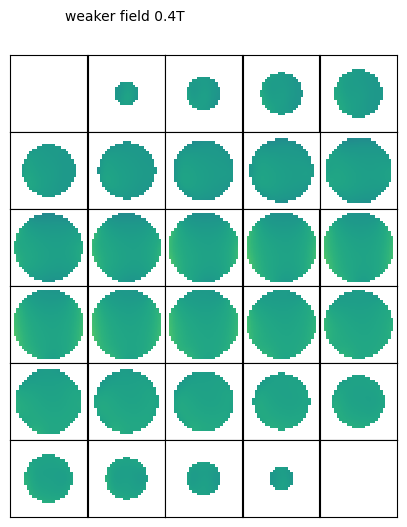

0.6000000000000001
[ 0.00000000e+00 -9.04698471e-10  6.81571215e-09]
[ 0.00000000e+00 -1.00208172e-09  6.80207642e-09]
[ 0.00000000e+00 -9.11610972e-10  6.81479103e-09]
[ 0.00000000e+00 -6.60669396e-10  6.84367791e-09]
[ 0.00000000e+00 -3.16335139e-10  6.86821254e-09]
[ 0.0000000e+00 -4.3944630e-11  6.8753531e-09]
[ 0.00000000e+00 -1.01260458e-11  6.87548608e-09]
[ 0.00000000e+00 -2.52847515e-09  6.39368633e-09]
[ 0.00000000e+00 -4.42493242e-09  5.26235541e-09]
[ 0.00000000e+00 -6.71718427e-09  1.46691748e-09]
[ 0.00000000e+00 -4.69640305e-09 -5.02157443e-09]
[ 0.00000000e+00 -7.51595596e-10 -6.83428968e-09]
[0.00000000e+00 6.87549354e-09 7.11192001e-15]
[0.00000000e+00 6.87549354e-09 5.52505711e-18]
[0.00000000e+00 6.87549354e-09 1.64789578e-14]
[ 0.00000000e+00  6.66418294e-09 -1.69147188e-09]
[ 0.00000000e+00  6.84555622e-09 -6.40914566e-10]
[ 0.00000000e+00  6.87549354e-09 -1.64079716e-14]
[0.00000000e+00 6.77226479e-09 1.18694610e-09]
[ 0.00000000e+00  6.87549286e-09 -3.05012495e-

<Figure size 640x480 with 0 Axes>

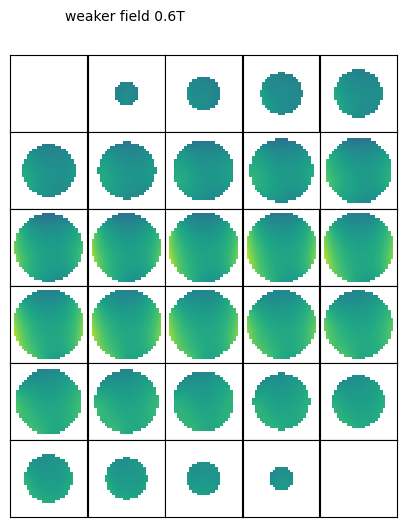

0.8
[ 0.00000000e+00 -1.35704771e-09  1.02235682e-08]
[ 0.00000000e+00 -1.50312258e-09  1.02031146e-08]
[ 0.00000000e+00 -1.36741646e-09  1.02221866e-08]
[ 0.00000000e+00 -9.91004094e-10  1.02655169e-08]
[ 0.00000000e+00 -4.74502708e-10  1.03023188e-08]
[ 0.00000000e+00 -6.59169450e-11  1.03130297e-08]
[ 0.00000000e+00 -1.51890688e-11  1.03132291e-08]
[ 0.00000000e+00 -3.79271272e-09  9.59052949e-09]
[ 0.00000000e+00 -6.63739863e-09  7.89353312e-09]
[ 0.00000000e+00 -1.00757764e-08  2.20037622e-09]
[ 0.00000000e+00 -7.04460458e-09 -7.53236165e-09]
[ 0.00000000e+00 -1.12739339e-09 -1.02514345e-08]
[0.00000000e+00 1.03132403e-08 1.06678800e-14]
[0.00000000e+00 1.03132403e-08 8.28758567e-18]
[0.00000000e+00 1.03132403e-08 2.47184367e-14]
[ 0.00000000e+00  9.99627441e-09 -2.53720782e-09]
[ 0.00000000e+00  1.02683343e-08 -9.61371849e-10]
[ 0.00000000e+00  1.03132403e-08 -2.46119575e-14]
[0.00000000e+00 1.01583972e-08 1.78041915e-09]
[ 0.00000000e+00  1.03132393e-08 -4.57518742e-12]
[ 0.0000

<Figure size 640x480 with 0 Axes>

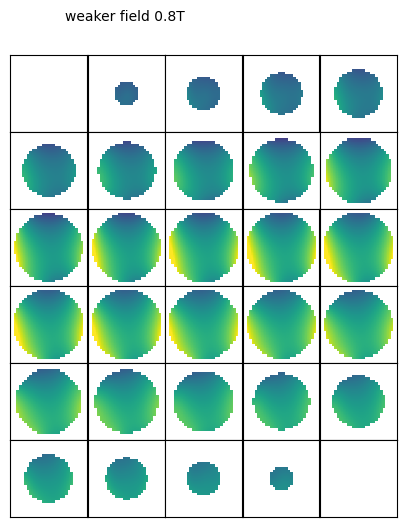

1.0
[ 0.00000000e+00 -1.80939694e-09  1.36314243e-08]
[ 0.00000000e+00 -2.00416344e-09  1.36041528e-08]
[ 0.00000000e+00 -1.82322194e-09  1.36295821e-08]
[ 0.00000000e+00 -1.32133879e-09  1.36873558e-08]
[ 0.00000000e+00 -6.32670278e-10  1.37364251e-08]
[ 0.00000000e+00 -8.78892600e-11  1.37507062e-08]
[ 0.00000000e+00 -2.02520917e-11  1.37509722e-08]
[ 0.00000000e+00 -5.05695029e-09  1.27873727e-08]
[ 0.00000000e+00 -8.84986484e-09  1.05247108e-08]
[ 0.00000000e+00 -1.34343685e-08  2.93383496e-09]
[ 0.00000000e+00 -9.39280610e-09 -1.00431489e-08]
[ 0.00000000e+00 -1.50319119e-09 -1.36685794e-08]
[0.00000000e+00 1.37509871e-08 1.42238400e-14]
[0.00000000e+00 1.37509871e-08 1.10501142e-17]
[0.00000000e+00 1.37509871e-08 3.29579156e-14]
[ 0.00000000e+00  1.33283659e-08 -3.38294376e-09]
[ 0.00000000e+00  1.36911124e-08 -1.28182913e-09]
[ 0.00000000e+00  1.37509871e-08 -3.28159433e-14]
[0.00000000e+00 1.35445296e-08 2.37389220e-09]
[ 0.00000000e+00  1.37509857e-08 -6.10024990e-12]
[ 0.0000

<Figure size 640x480 with 0 Axes>

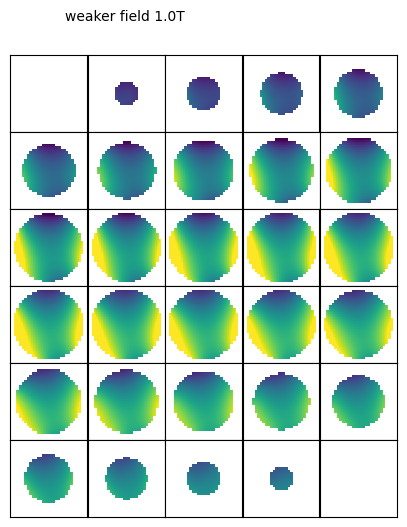

1.2000000000000002
[ 0.00000000e+00 -2.26174618e-09  1.70392804e-08]
[ 0.00000000e+00 -2.50520431e-09  1.70051911e-08]
[ 0.00000000e+00 -2.27902743e-09  1.70369776e-08]
[ 0.00000000e+00 -1.65167349e-09  1.71091948e-08]
[ 0.00000000e+00 -7.90837847e-10  1.71705313e-08]
[ 0.00000000e+00 -1.09861575e-10  1.71883828e-08]
[ 0.00000000e+00 -2.53151146e-11  1.71887152e-08]
[ 0.00000000e+00 -6.32118787e-09  1.59842158e-08]
[ 0.00000000e+00 -1.10623311e-08  1.31558885e-08]
[ 0.00000000e+00 -1.67929607e-08  3.66729369e-09]
[ 0.00000000e+00 -1.17410076e-08 -1.25539361e-08]
[ 0.00000000e+00 -1.87898899e-09 -1.70857242e-08]
[0.00000000e+00 1.71887338e-08 1.77798000e-14]
[0.00000000e+00 1.71887338e-08 1.38126428e-17]
[0.00000000e+00 1.71887338e-08 4.11973945e-14]
[ 0.00000000e+00  1.66604574e-08 -4.22867970e-09]
[ 0.00000000e+00  1.71138905e-08 -1.60228642e-09]
[ 0.00000000e+00  1.71887338e-08 -4.10199291e-14]
[0.00000000e+00 1.69306620e-08 2.96736525e-09]
[ 0.00000000e+00  1.71887322e-08 -7.6253123

<Figure size 640x480 with 0 Axes>

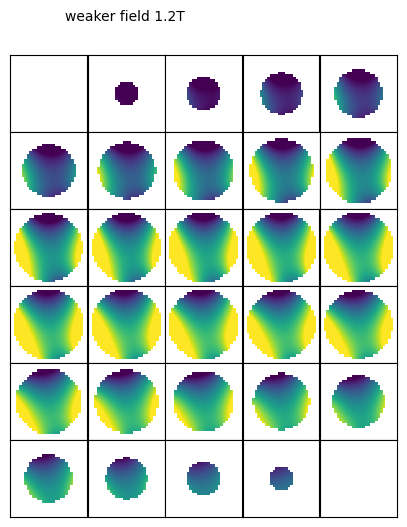

1.4000000000000001
[ 0.00000000e+00 -2.71409541e-09  2.04471364e-08]
[ 0.00000000e+00 -3.00624517e-09  2.04062293e-08]
[ 0.00000000e+00 -2.73483292e-09  2.04443731e-08]
[ 0.00000000e+00 -1.98200819e-09  2.05310337e-08]
[ 0.00000000e+00 -9.49005417e-10  2.06046376e-08]
[ 0.00000000e+00 -1.31833890e-10  2.06260593e-08]
[ 0.00000000e+00 -3.03781375e-11  2.06264582e-08]
[ 0.00000000e+00 -7.58542544e-09  1.91810590e-08]
[ 0.00000000e+00 -1.32747973e-08  1.57870662e-08]
[ 0.00000000e+00 -2.01515528e-08  4.40075243e-09]
[ 0.00000000e+00 -1.40892092e-08 -1.50647233e-08]
[ 0.00000000e+00 -2.25478679e-09 -2.05028690e-08]
[0.00000000e+00 2.06264806e-08 2.13357600e-14]
[0.00000000e+00 2.06264806e-08 1.65751713e-17]
[0.00000000e+00 2.06264806e-08 4.94368734e-14]
[ 0.00000000e+00  1.99925488e-08 -5.07441564e-09]
[ 0.00000000e+00  2.05366687e-08 -1.92274370e-09]
[ 0.00000000e+00  2.06264806e-08 -4.92239149e-14]
[0.00000000e+00 2.03167944e-08 3.56083830e-09]
[ 0.00000000e+00  2.06264786e-08 -9.1503748

<Figure size 640x480 with 0 Axes>

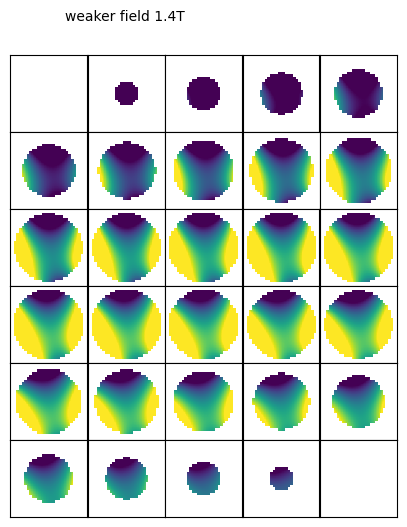

1.6
[ 0.00000000e+00 -3.16644465e-09  2.38549925e-08]
[ 0.00000000e+00 -3.50728603e-09  2.38072675e-08]
[ 0.00000000e+00 -3.19063840e-09  2.38517686e-08]
[ 0.00000000e+00 -2.31234289e-09  2.39528727e-08]
[ 0.00000000e+00 -1.10717299e-09  2.40387439e-08]
[ 0.00000000e+00 -1.53806205e-10  2.40637359e-08]
[ 0.00000000e+00 -3.54411604e-11  2.40642013e-08]
[ 0.00000000e+00 -8.84966301e-09  2.23779021e-08]
[ 0.00000000e+00 -1.54872635e-08  1.84182439e-08]
[ 0.00000000e+00 -2.35101449e-08  5.13421117e-09]
[ 0.00000000e+00 -1.64374107e-08 -1.75755105e-08]
[ 0.00000000e+00 -2.63058459e-09 -2.39200139e-08]
[0.00000000e+00 2.40642274e-08 2.48917200e-14]
[0.00000000e+00 2.40642274e-08 1.93376999e-17]
[0.00000000e+00 2.40642274e-08 5.76763523e-14]
[ 0.00000000e+00  2.33246403e-08 -5.92015158e-09]
[ 0.00000000e+00  2.39594468e-08 -2.24320098e-09]
[ 0.00000000e+00  2.40642274e-08 -5.74279007e-14]
[0.00000000e+00 2.37029268e-08 4.15431135e-09]
[ 0.00000000e+00  2.40642250e-08 -1.06754373e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

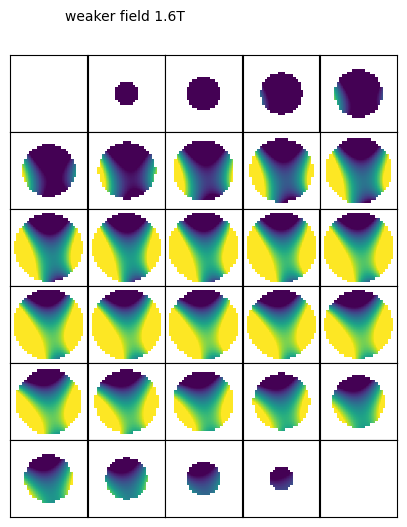

1.8
[ 0.00000000e+00 -3.61879388e-09  2.72628486e-08]
[ 0.00000000e+00 -4.00832689e-09  2.72083057e-08]
[ 0.00000000e+00 -3.64644389e-09  2.72591641e-08]
[ 0.00000000e+00 -2.64267758e-09  2.73747116e-08]
[ 0.00000000e+00 -1.26534056e-09  2.74728502e-08]
[ 0.00000000e+00 -1.75778520e-10  2.75014124e-08]
[ 0.00000000e+00 -4.05041834e-11  2.75019443e-08]
[ 0.00000000e+00 -1.01139006e-08  2.55747453e-08]
[ 0.00000000e+00 -1.76997297e-08  2.10494216e-08]
[ 0.00000000e+00 -2.68687371e-08  5.86766991e-09]
[ 0.00000000e+00 -1.87856122e-08 -2.00862977e-08]
[ 0.00000000e+00 -3.00638238e-09 -2.73371587e-08]
[0.00000000e+00 2.75019742e-08 2.84476800e-14]
[0.00000000e+00 2.75019742e-08 2.21002285e-17]
[0.00000000e+00 2.75019742e-08 6.59158312e-14]
[ 0.00000000e+00  2.66567318e-08 -6.76588752e-09]
[ 0.00000000e+00  2.73822249e-08 -2.56365826e-09]
[ 0.00000000e+00  2.75019742e-08 -6.56318866e-14]
[0.00000000e+00 2.70890592e-08 4.74778440e-09]
[ 0.00000000e+00  2.75019715e-08 -1.22004998e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

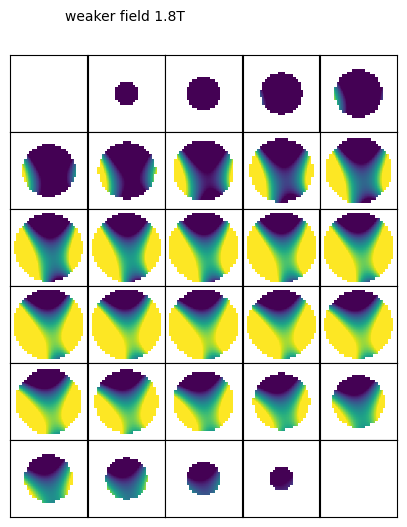

2.0
[ 0.00000000e+00 -4.07114312e-09  3.06707047e-08]
[ 0.00000000e+00 -4.50936775e-09  3.06093439e-08]
[ 0.00000000e+00 -4.10224937e-09  3.06665597e-08]
[ 0.00000000e+00 -2.97301228e-09  3.07965506e-08]
[ 0.00000000e+00 -1.42350813e-09  3.09069564e-08]
[ 0.00000000e+00 -1.97750835e-10  3.09390890e-08]
[ 0.00000000e+00 -4.55672063e-11  3.09396874e-08]
[ 0.00000000e+00 -1.13781382e-08  2.87715885e-08]
[ 0.00000000e+00 -1.99121959e-08  2.36805994e-08]
[ 0.00000000e+00 -3.02273292e-08  6.60112865e-09]
[ 0.00000000e+00 -2.11338137e-08 -2.25970850e-08]
[ 0.00000000e+00 -3.38218018e-09 -3.07543036e-08]
[0.00000000e+00 3.09397209e-08 3.20036400e-14]
[0.00000000e+00 3.09397209e-08 2.48627570e-17]
[0.00000000e+00 3.09397209e-08 7.41553101e-14]
[ 0.00000000e+00  2.99888232e-08 -7.61162346e-09]
[ 0.00000000e+00  3.08050030e-08 -2.88411555e-09]
[ 0.00000000e+00  3.09397209e-08 -7.38358724e-14]
[0.00000000e+00 3.04751915e-08 5.34125745e-09]
[ 0.00000000e+00  3.09397179e-08 -1.37255623e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

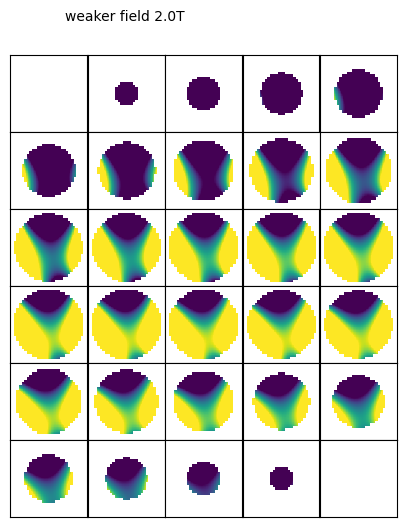

2.2
[ 0.00000000e+00 -4.52349236e-09  3.40785607e-08]
[ 0.00000000e+00 -5.01040861e-09  3.40103821e-08]
[ 0.00000000e+00 -4.55805486e-09  3.40739552e-08]
[ 0.00000000e+00 -3.30334698e-09  3.42183896e-08]
[ 0.00000000e+00 -1.58167569e-09  3.43410627e-08]
[ 0.00000000e+00 -2.19723150e-10  3.43767655e-08]
[ 0.00000000e+00 -5.06302292e-11  3.43774304e-08]
[ 0.00000000e+00 -1.26423757e-08  3.19684316e-08]
[ 0.00000000e+00 -2.21246621e-08  2.63117771e-08]
[ 0.00000000e+00 -3.35859214e-08  7.33458739e-09]
[ 0.00000000e+00 -2.34820153e-08 -2.51078722e-08]
[ 0.00000000e+00 -3.75797798e-09 -3.41714484e-08]
[0.00000000e+00 3.43774677e-08 3.55596000e-14]
[0.00000000e+00 3.43774677e-08 2.76252856e-17]
[0.00000000e+00 3.43774677e-08 8.23947890e-14]
[ 0.00000000e+00  3.33209147e-08 -8.45735940e-09]
[ 0.00000000e+00  3.42277811e-08 -3.20457283e-09]
[ 0.00000000e+00  3.43774677e-08 -8.20398582e-14]
[0.00000000e+00 3.38613239e-08 5.93473050e-09]
[ 0.00000000e+00  3.43774643e-08 -1.52506247e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

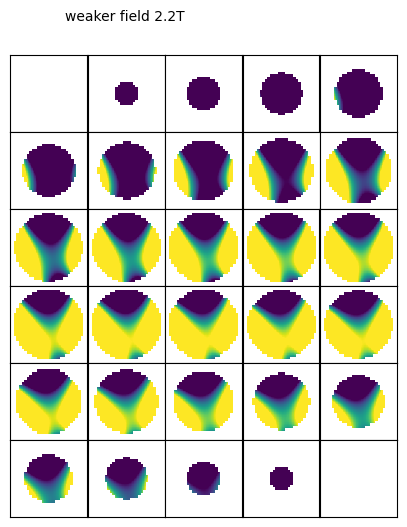

2.4000000000000004
[ 0.00000000e+00 -4.97584159e-09  3.74864168e-08]
[ 0.00000000e+00 -5.51144947e-09  3.74114203e-08]
[ 0.00000000e+00 -5.01386035e-09  3.74813507e-08]
[ 0.00000000e+00 -3.63368168e-09  3.76402285e-08]
[ 0.00000000e+00 -1.73984326e-09  3.77751690e-08]
[ 0.00000000e+00 -2.41695465e-10  3.78144421e-08]
[ 0.00000000e+00 -5.56932521e-11  3.78151735e-08]
[ 0.00000000e+00 -1.39066133e-08  3.51652748e-08]
[ 0.00000000e+00 -2.43371283e-08  2.89429548e-08]
[ 0.00000000e+00 -3.69445135e-08  8.06804613e-09]
[ 0.00000000e+00 -2.58302168e-08 -2.76186594e-08]
[ 0.00000000e+00 -4.13377578e-09 -3.75885933e-08]
[0.00000000e+00 3.78152145e-08 3.91155600e-14]
[0.00000000e+00 3.78152145e-08 3.03878141e-17]
[0.00000000e+00 3.78152145e-08 9.06342678e-14]
[ 0.00000000e+00  3.66530062e-08 -9.30309534e-09]
[ 0.00000000e+00  3.76505592e-08 -3.52503011e-09]
[ 0.00000000e+00  3.78152145e-08 -9.02438440e-14]
[0.00000000e+00 3.72474563e-08 6.52820355e-09]
[ 0.00000000e+00  3.78152107e-08 -1.6775687

<Figure size 640x480 with 0 Axes>

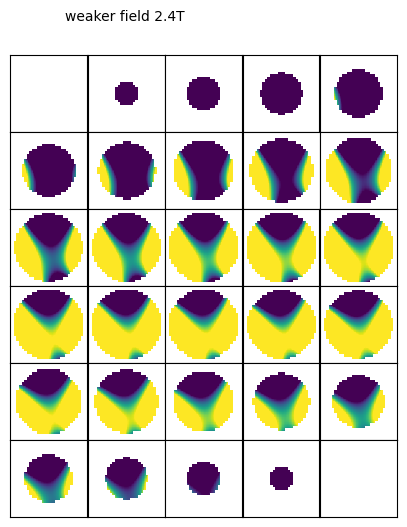

2.6
[ 0.00000000e+00 -5.42819083e-09  4.08942729e-08]
[ 0.00000000e+00 -6.01249033e-09  4.08124585e-08]
[ 0.00000000e+00 -5.46966583e-09  4.08887462e-08]
[ 0.00000000e+00 -3.96401638e-09  4.10620675e-08]
[ 0.00000000e+00 -1.89801083e-09  4.12092752e-08]
[ 0.00000000e+00 -2.63667780e-10  4.12521186e-08]
[ 0.00000000e+00 -6.07562750e-11  4.12529165e-08]
[ 0.00000000e+00 -1.51708509e-08  3.83621180e-08]
[ 0.00000000e+00 -2.65495945e-08  3.15741325e-08]
[ 0.00000000e+00 -4.03031056e-08  8.80150487e-09]
[ 0.00000000e+00 -2.81784183e-08 -3.01294466e-08]
[ 0.00000000e+00 -4.50957358e-09 -4.10057381e-08]
[0.00000000e+00 4.12529612e-08 4.26715200e-14]
[0.00000000e+00 4.12529612e-08 3.31503427e-17]
[0.00000000e+00 4.12529612e-08 9.88737467e-14]
[ 0.00000000e+00  3.99850977e-08 -1.01488313e-08]
[ 0.00000000e+00  4.10733373e-08 -3.84548740e-09]
[ 0.00000000e+00  4.12529612e-08 -9.84478298e-14]
[0.00000000e+00 4.06335887e-08 7.12167660e-09]
[ 0.00000000e+00  4.12529572e-08 -1.83007497e-11]
[ 0.0000

<Figure size 640x480 with 0 Axes>

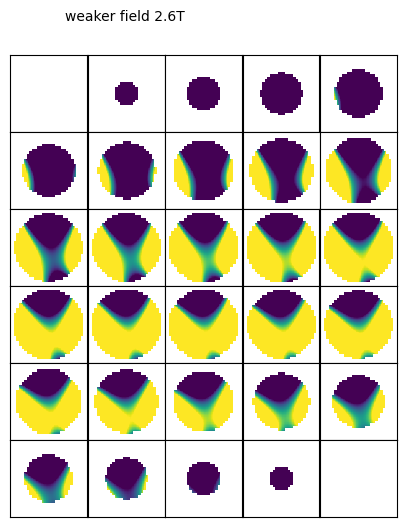

2.8000000000000003
[ 0.00000000e+00 -5.88054006e-09  4.43021290e-08]
[ 0.00000000e+00 -6.51353120e-09  4.42134967e-08]
[ 0.00000000e+00 -5.92547132e-09  4.42961417e-08]
[ 0.00000000e+00 -4.29435108e-09  4.44839064e-08]
[ 0.00000000e+00 -2.05617840e-09  4.46433815e-08]
[ 0.00000000e+00 -2.85640095e-10  4.46897952e-08]
[ 0.00000000e+00 -6.58192980e-11  4.46906595e-08]
[ 0.00000000e+00 -1.64350885e-08  4.15589611e-08]
[ 0.00000000e+00 -2.87620607e-08  3.42053102e-08]
[ 0.00000000e+00 -4.36616978e-08  9.53496360e-09]
[ 0.00000000e+00 -3.05266198e-08 -3.26402338e-08]
[ 0.00000000e+00 -4.88537138e-09 -4.44228829e-08]
[0.0000000e+00 4.4690708e-08 4.6227480e-14]
[0.00000000e+00 4.46907080e-08 3.59128712e-17]
[0.00000000e+00 4.46907080e-08 1.07113226e-13]
[ 0.00000000e+00  4.33171891e-08 -1.09945672e-08]
[ 0.00000000e+00  4.44961154e-08 -4.16594468e-09]
[ 0.00000000e+00  4.46907080e-08 -1.06651816e-13]
[0.00000000e+00 4.40197211e-08 7.71514965e-09]
[ 0.00000000e+00  4.46907036e-08 -1.98258122e-

<Figure size 640x480 with 0 Axes>

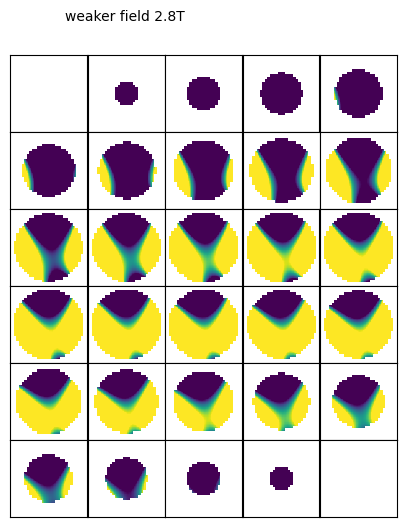

3.0
[ 0.0000000e+00 -6.3328893e-09  4.7709985e-08]
[ 0.00000000e+00 -7.01457206e-09  4.76145349e-08]
[ 0.00000000e+00 -6.38127680e-09  4.77035372e-08]
[ 0.00000000e+00 -4.62468577e-09  4.79057454e-08]
[ 0.00000000e+00 -2.21434597e-09  4.80774878e-08]
[ 0.00000000e+00 -3.07612410e-10  4.81274717e-08]
[ 0.00000000e+00 -7.08823209e-11  4.81284026e-08]
[ 0.00000000e+00 -1.76993260e-08  4.47558043e-08]
[ 0.00000000e+00 -3.09745269e-08  3.68364879e-08]
[ 0.00000000e+00 -4.70202899e-08  1.02684223e-08]
[ 0.00000000e+00 -3.28748214e-08 -3.51510210e-08]
[ 0.00000000e+00 -5.26116917e-09 -4.78400278e-08]
[0.00000000e+00 4.81284548e-08 4.97834401e-14]
[0.00000000e+00 4.81284548e-08 3.86753998e-17]
[0.00000000e+00 4.81284548e-08 1.15352705e-13]
[ 0.00000000e+00  4.66492806e-08 -1.18403032e-08]
[ 0.00000000e+00  4.79188935e-08 -4.48640196e-09]
[ 0.00000000e+00  4.81284548e-08 -1.14855801e-13]
[0.00000000e+00 4.74058535e-08 8.30862271e-09]
[ 0.00000000e+00  4.81284500e-08 -2.13508746e-11]
[ 0.0000000

<Figure size 640x480 with 0 Axes>

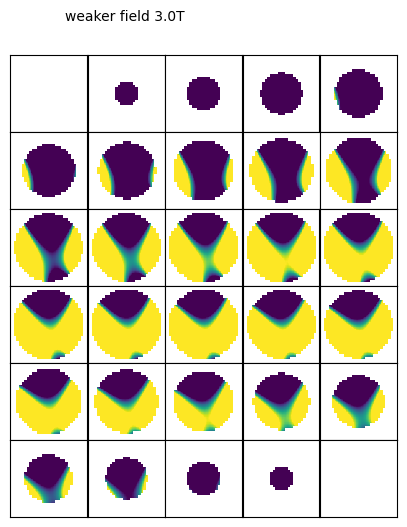

In [30]:
# shimmed map with weaker magnets
# generation of weaker magnet fields with simulated rotations
shimFieldRendered_weaker= shimming_magnets[0].B0[:,:,:,2]*0 # weaker magnets with 1.28 T magnetization

for bRem in np.linspace(0,3,16):
    print(bRem)

    shimming_magnets_weaker = []

    for magnet in shimming_magnets:
        magnet_weaker = magnet
        magnet_weaker.bRem = bRem# 0.9#+1.35*np.random.randint(10)/100 # weaker
        shimming_magnets_weaker.append(magnet_weaker)

    for idx, magnet in enumerate(shimming_magnets_weaker):
        alpha = optimized_vector_of_magnet_rotations[idx]
        magnet.rotation_yz = alpha#+2*np.pi/100*np.random.randint(-10,10)#+2*np.pi/4
        #pos = positions[idx]
        magnet.position = np.array(positions[idx])+[np.random.randint(10)/1000, 0,0]
        #magnet.update_rotation(rotation_yz=alpha+0*np.pi/2)
        magnet.render_field(grid=coordinate_grid)
        shimFieldRendered_weaker += magnet.B0[:,:,:,2]#magnet.B0[:,:,:,1]*np.sin(alpha)+magnet.B0[:,:,:,2]*np.cos(alpha)

    shimField_fair_weaker = initialField+shimFieldRendered_weaker*1.00e3#[:,:,:]*1+np.multiply(shimFieldRendered[:,:,:,2]*1000,lsqData.x)#+shimFieldRendered[:,:,:,1]*1000 #???? why 1st not 2nd component!?!!s

    # calculate ppm
    homoweak = (np.nanmax(shimField_fair_weaker)-np.nanmin(shimField_fair_weaker))/np.nanmean(shimField_fair_weaker)*1e6
    print('weaker_ppm: %d'%int(homoweak))

    # plotting of weaker fields
    
    plt.figure(0)
    fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(5, 6))

    xvals = b0map_after.xDim_SPH_fine


    for i in range(5):
        for j in range(6):
            xxx = axes[j,i].imshow(shimField_fair_weaker[i+j*5,:,:]+np.nanmean(initialField)-np.nanmean(shimField_fair_weaker),clim=[np.nanmin(initialField),np.nanmax(initialField)])
            axes[j,i].xaxis.set_visible(False)
            axes[j,i].yaxis.set_visible(False)
            
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.text(-100,-164,'weaker field %.1fT'%bRem)

    plt.savefig('./pics/weaker_field_%.1fT.png'%bRem,format="png")
    plt.savefig('./pics/weaker_field_%.1fT.png'%bRem,format="pdf")
    #plt.colorbar(mappable=xxx)
    plt.show()



In [ ]:
print(positions[idx])

In [ ]:


#shimField = initialField+optimizedField

homoinit = (np.nanmax(initialField)-np.nanmin(initialField))/np.nanmean(initialField)*1e6
homo = (np.nanmax(shimField)-np.nanmin(shimField))/np.nanmean(shimField)*1e6
print('inhomogeneity ppm %.0f -> %.0f'%(abs(homoinit),abs(homo)))
print('mean mT %.2f -> %.2f'%(abs(np.nanmin(initialField)),abs(np.nanmin(shimField))))

xvals = b0map.xDim_SPH_fine

shimoffset = np.nanmean(shimField) - np.nanmean(initialField)
d = np.shape(coordinate_grid[0])
print(d[0])
for i in range(d[0]):
    fig = plt.figure()
    plt.imshow(shimField[i,:,:],clim=[np.nanmin(initialField)+shimoffset,np.nanmax(initialField)+shimoffset])
    plt.colorbar()
    plt.title('shimmed cheap [%d ppm], x = %d mm'%(homo_cheap,xvals[i]))
    plt.show()
    fig.savefig('./pics/CF%d'%i)


for i in range(d[0]):
    plt.imshow(initialField[i,:,:],clim=[np.nanmin(initialField),np.nanmax(initialField)])
    plt.title('initial, [%d ppm], x = %d mm'%(homoinit,xvals[i]))
    plt.colorbar()
    plt.show()
    plt.savefig('./pics/IF%d'%i)


for i in range(d[0]):
    plt.imshow(shimField_fair[i,:,:],clim=[np.nanmin(initialField),np.nanmax(initialField)]+shimoffset)
    plt.colorbar()
    plt.title('shimmed fair [%d ppm], x = %d mm'%(homo_fair,xvals[i]))
    plt.show()
    plt.savefig('./pics/SF%d'%i)



In [31]:
#saving rings
for idx,magnet in enumerate(shimming_magnets):
      magnet.rotation = optimized_vector_of_magnet_rotations[idx]
      magnet.render_field(coordinate_grid)

def save_rings(fname:str):
        print('save magnet positions and rotations to the file')
        with open(fname, 'w') as file:
            file.write('x[m],y[m],z[m],dirx[m^2A],diry[m^2A],dirz[m^2A],rotation_xy[rad]\n')
            for idx,alpha in enumerate(optimized_vector_of_magnet_rotations):
                 pos = positions[idx]
                 magnet = shimming_magnets[idx]
                 x=pos[0]
                 y=pos[1]
                 z=pos[2]
                 dirx = magnet.dipole_vector[0]
                 diry = magnet.dipole_vector[1]
                 dirz = magnet.dipole_vector[2]     
                 rot  = alpha

                 file.write('%.4f,%.4f,%.4f,%.4e,%.4e,%.4e,%.4f\n'%(x,y,z,dirx,diry,dirz,rot))
        file.close()
        print('exported magnet rotations/positions as *txt file')

save_rings('./shimming/rings/240726_xy_indexing_iter2_magnets_rotations_917ppm_8mm.txt')


[ 0.00000000e+00 -6.78523853e-09  5.11178411e-08]
[ 0.00000000e+00 -7.51561292e-09  5.10155732e-08]
[ 0.00000000e+00 -6.83708229e-09  5.11109328e-08]
[ 0.00000000e+00 -4.95502047e-09  5.13275843e-08]
[ 0.00000000e+00 -2.37251354e-09  5.15115940e-08]
[ 0.00000000e+00 -3.29584725e-10  5.15651483e-08]
[ 0.00000000e+00 -7.59453438e-11  5.15661456e-08]
[ 0.00000000e+00 -1.89635636e-08  4.79526475e-08]
[ 0.00000000e+00 -3.31869932e-08  3.94676656e-08]
[ 0.00000000e+00 -5.03788820e-08  1.10018811e-08]
[ 0.00000000e+00 -3.52230229e-08 -3.76618083e-08]
[ 0.00000000e+00 -5.63696697e-09 -5.12571726e-08]
[0.00000000e+00 5.15662015e-08 5.33394001e-14]
[0.00000000e+00 5.15662015e-08 4.14379284e-17]
[0.00000000e+00 5.15662015e-08 1.23592183e-13]
[ 0.00000000e+00  4.99813721e-08 -1.26860391e-08]
[ 0.00000000e+00  5.13416716e-08 -4.80685925e-09]
[ 0.00000000e+00  5.15662015e-08 -1.23059787e-13]
[0.00000000e+00 5.07919859e-08 8.90209576e-09]
[ 0.00000000e+00  5.15661965e-08 -2.28759371e-11]
[ 0.00000000

In [ ]:
# making gifs

# now making a gif
from PIL import Image
import glob
import time

def make_gif_from_filename(input:str,output:str):
    # create an empty list called images
    images = []

    # get the current time to use in the filename
    timestr = time.strftime("%Y%m%d-%H%M%S")

    # get all the images in the 'images for gif' folder
    for idx in range(30): # loop through all png files in the folder
        filename = './pics/%s%d.png'%(input,idx)
        im = Image.open(filename) # open the image
        #im_small = im.resize((1080, 70), resample=1) # resize them to make them a bit smaller
        images.append(im) # add the image to the list

    # calculate the frame number of the last frame (ie the number of images)
    last_frame = (len(images)) 

    # create 10 extra copies of the last frame (to make the gif spend longer on the most recent data)
    #for x in range(0, 9):
    #    im = images[last_frame-1]
    #    images.append(im)

    # save as a gif   
    images[0].save('./gifs/%s'%output+timestr+'.gif',
                save_all=True, append_images=images[1:], optimize=False, duration=80, loop=0)
    
# cheap field gif
make_gif_from_filename(input='CF',output='shimmed_field_cheap')


In [ ]:
# now save the shimmed map for Jan
#ax = plt.figure().add_subplot(projection='3d')
#ax.scatter(b0map.path.r[:,0],b0map.path.r[:,1],b0map.path.r[:,2])
#plt.show()

# print the coordinate grid on which the field was rendered
print(np.shape(coordinate_grid))
print(len(X)) 
idx2=0

import datetime
with open("./shimming/tocomsol/shimmed_field_simulated_OSI2_V1_iter2.csv", 'w') as file:
    file.write('# Shimming of B0M %s\n'%filename_to_import_csv_data_from)
    file.write('# time %s\n'%str(datetime.datetime.now()))
    file.write('# MAGNET CENTER IN LAB: x 0 mm, y 0 mm, z 0 mm\n')
    file.write('# MAGNET AXES WRT LAB: alpha 0.00 deg, beta 0.00 deg, gamma 0.00 deg\n')
    file.write('# path: see repo\n')
    file.write('# X[mm],Y[mm],Z[mm],B0_x[mT],B0_y[mT],B0_z[mT],B0_abs[mT]\n')
    for i,x in enumerate(X):
        for j,y in enumerate(Y):
            for k,z in enumerate(Z):
                if shimField[i,j,k] <=0:
                    file.write('%.4f,%.4f,%.4f,%.4f,%.4f,%.4f,%.4f\n'%(x,y,z,shimField[i,j,k],0,0,abs(shimField[i,j,k])))
                    print('%.4f,%.4f,%.4f,%.4f\n'%(x,y,z,shimField[i,j,k]))
                idx2+=1
print(np.shape(shimField))


In [32]:
# now exporting the rings separately.
for ring_counter in range(4):
    
    print('exporting RING_%d with position X=%.2f mm tray insert nr. %d'%(ring_counter,float(ringPositions[ring_counter])*1e3,trays_occupied[ring_counter]))

    ringpos = ringPositions[ring_counter]
    with open("./shimming/rings/iteration2_attempt3/B_Iteration_2-RING_%d_XY.txt"%ring_counter, 'w') as file:
        for idx,position in enumerate(positions):
            if ringpos == position[0]:
                alpha = optimized_vector_of_magnet_rotations[idx]       
                file.write("%.2f, %.2f, %.2f, %.2f\n"%(position[0]*1e3,position[1]*1e3,position[2]*1e3, alpha*180/np.pi))

exporting RING_0 with position X=-58.50 mm tray insert nr. -7
exporting RING_1 with position X=-40.50 mm tray insert nr. -5
exporting RING_2 with position X=4.50 mm tray insert nr. 1
exporting RING_3 with position X=121.50 mm tray insert nr. 14
